# PUI2016 HW7 - jp4772
## Assignment 1

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import os

%matplotlib inline

In [3]:
if os.getenv("PUIDATA"):
    data_path = os.getenv("PUIDATA")
else:
    os.system('mkdir data')
    data_path = "./data"

In [13]:
# Download parking ramp transactions for city owned parking lots in Grand Rapids, Michigan
os.system("curl -o " + data_path + "/parking.csv" + " http://data.grcity.us/storage/f/2014-02-25T15%3A41%3A28.693Z/revenue-transaction-report-2011.csv")

0

In [14]:
df = pd.read_csv(data_path + "/parking.csv")

In [15]:
df.head(3)

,Entry Time,Exit Time,Gross,Lane,Lot,Rate,Ticket,Transaction Number
0,NaN,1/1/2011 0:06,$9.00,46,17,1,0,133
1,NaN,1/1/2011 0:26,$14.00,24,6,1,0,163
2,NaN,1/1/2011 0:54,$6.00,44,15,0,0,37159


In [49]:
# Drop NaN, which is primarily from exit times from parking before midnight
df = df.dropna()

# Delete all entry events that happened before the beginning of 2011
df = df[df.entry >= "2011-01-01"]

In [53]:
# Still a good amount of observations
len(df)

991102

In [38]:
# Create datetime of entry and exit times
df["entry"] = pd.to_datetime(df["Entry Time"])
df["exit"] = pd.to_datetime(df["Exit Time"])

In [60]:
# Make Gross currently string into float
df["paid"] = df["Gross"].replace('[\$,]', '', regex=True).astype(float)

In [43]:
df.set_index(pd.DatetimeIndex(df.entry), inplace=True)

In [61]:
df.head(3)

,Entry Time,Exit Time,Gross,Lane,Lot,Rate,Ticket,Transaction Number,entry,exit,paid
2011-01-01 00:04:00,1/1/2011 0:04,1/1/2011 1:06,$2.00,20,8,3,25016,233,2011-01-01 00:04:00,2011-01-01 01:06:00,2.0
2011-01-01 00:08:00,1/1/2011 0:08,1/1/2011 2:55,$6.00,20,8,3,25017,309,2011-01-01 00:08:00,2011-01-01 02:55:00,6.0
2011-01-01 00:27:00,1/1/2011 0:27,1/1/2011 2:34,$5.00,23,4,1,75164,209,2011-01-01 00:27:00,2011-01-01 02:34:00,5.0


In [63]:
# Group by month counting number of transactions
parking_count = df.groupby(pd.Grouper(key='entry', freq='M')).size()

In [64]:
# Group by month summing gross payments
parking_paid = df.groupby(pd.Grouper(key='entry', freq='M')).sum().paid

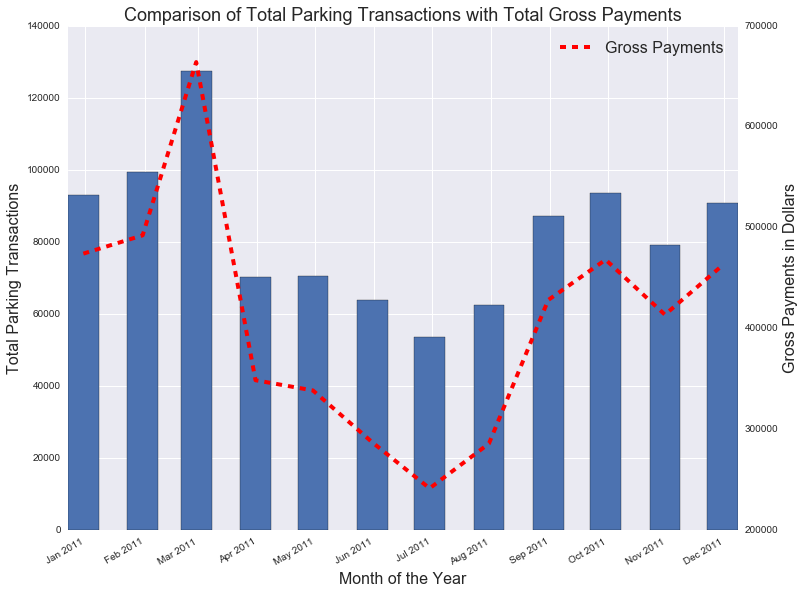

In [182]:
f, ax1 = plt.subplots(figsize=(12, 10))

# Subtract by one month since the index rounds up from the last day of the month to the next month
index = parking_count.index.map(lambda x: x - 1)

ax1.bar(index, parking_count, 16, align='center')
ax1.set_ylabel('Total Parking Transactions', fontsize=16)
ax1.set_xlabel('Month of the Year', fontsize=16)

ax1.set_title("Comparison of Total Parking Transactions with Total Gross Payments", fontsize=18)

ax2 = ax1.twinx()
ax2.plot(index, parking_paid.values, "r--", linewidth=4, label="Gross Payments")
ax2.set_ylabel('Gross Payments in Dollars', fontsize=16)
ax2.grid(b=None)

ax2.legend(loc=1, fontsize=16)

monthsFmt = DateFormatter("%b %Y")
ax1.xaxis.set_major_formatter(monthsFmt)

f.autofmt_xdate()

### Figure 1: Bar plot of monthly total parking transactions with comparison line showing gross payments per month.